In [1]:
from tensorflow.keras.utils import load_img, image_dataset_from_directory
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import array_to_img
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

C:\Users\Christina\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Christina\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\Christina\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Christina\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


-----------------
Read train and test sets

In [2]:
training_set = [(i, l) for i, l in image_dataset_from_directory('trafficsigns/train', image_size = (128, 128), batch_size = None, seed = 123)]
test_set = [(i, l) for i, l in image_dataset_from_directory('trafficsigns/test', image_size = (128, 128), batch_size = None, seed = 123)]

with open("classlabels.txt") as infile:
    labels = dict((int(i), j) for i, j in json.loads(infile.read()).items())
print("The 20 classes are: " + ", ".join(str(l) for l in labels.values()))

Found 1792 files belonging to 20 classes.
Found 1022 files belonging to 20 classes.
The 20 classes are: limit30, limit50, limit60, limit80, noleft, noright, nouturn, gostraight, goleft, goright, keepright, roundabout, danger, pedestrcross, bikecross, childcross, traincross, construction, nostopping, noentry


-----------
Select labels

In [3]:
labels_to_keep = [0, 6, 4, 18] # Change this to determine which labels to keep (or change to list(range(20)) to keep all labels)
num_classes = len(labels_to_keep)

x_train = np.array([image for image, label in training_set if label in labels_to_keep])
y_train = np.array([labels_to_keep.index(label) for image, label in training_set if label in labels_to_keep])
x_test = np.array([image for image, label in test_set if label in labels_to_keep])
y_test = np.array([labels_to_keep.index(label) for image, label in test_set if label in labels_to_keep])

finallabels = dict([(i, labels[l]) for i, l in enumerate(labels_to_keep)])
print("The " + str(num_classes) + " classes are: " + ", ".join(str(l) for l in finallabels.values()))

The 4 classes are: limit30, nouturn, noleft, nostopping


In [4]:
x_train.shape

(564, 128, 128, 3)

------------
Plot example data

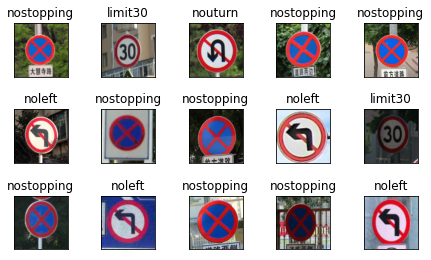

In [20]:
fig = plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.tight_layout()
    img = array_to_img(x_train[i])
    plt.imshow(img)
    plt.title(finallabels[y_train[i]])
    plt.xticks([])
    plt.yticks([])
plt.savefig("visualizations/example-data.png",bbox_inches='tight')

# Create the convolutional base

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

# Add Dense layers

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

# Compile and train the model

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
18/18 [==============================] - 7s 339ms/step - loss: 37.1717 - accuracy: 0.6720 - val_loss: 1.6986 - val_accuracy: 0.7463
Epoch 2/10
18/18 [==============================] - 6s 337ms/step - loss: 0.0662 - accuracy: 0.9752 - val_loss: 1.5116 - val_accuracy: 0.8109
Epoch 3/10
18/18 [==============================] - 7s 403ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.6912 - val_accuracy: 0.8010
Epoch 4/10
18/18 [==============================] - 9s 498ms/step - loss: 0.0124 - accuracy: 0.9965 - val_loss: 1.8064 - val_accuracy: 0.8259
Epoch 5/10
18/18 [==============================] - 10s 572ms/step - loss: 0.0123 - accuracy: 0.9965 - val_loss: 3.1657 - val_accuracy: 0.7562
Epoch 6/10
18/18 [==============================] - 8s 474ms/step - loss: 0.0340 - accuracy: 0.9929 - val_loss: 4.7078 - val_accuracy: 0.7612
Epoch 7/10
18/18 [==============================] - 8s 459ms/step - loss: 0.0389 - accuracy: 0.9894 - val_loss: 3.9591 - val_accuracy: 0.7811
Epoc

# Evaluate the model

13/13 - 1s - loss: 3.8059 - accuracy: 0.7960 - 1s/epoch - 91ms/step


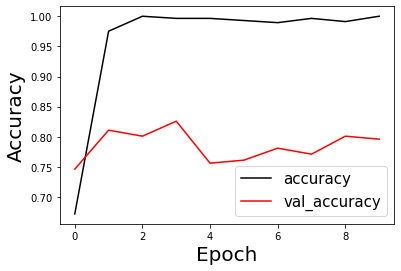

In [11]:
plt.plot(history.history['accuracy'], label='accuracy', color = 'k')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color = 'r')
plt.xlabel('Epoch', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(loc='lower right', fontsize=15)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
#plt.savefig("visualizations/accuracy_epoch.png",bbox_inches='tight')

13/13 - 1s - loss: 3.8059 - accuracy: 0.7960 - 1s/epoch - 83ms/step


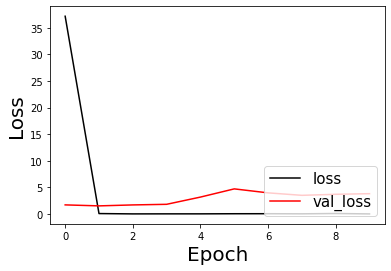

In [12]:
plt.plot(history.history['loss'], label='loss', color = 'k')
plt.plot(history.history['val_loss'], label = 'val_loss', color = 'r')
plt.xlabel('Epoch', size=20)
plt.ylabel('Loss', size=20)
plt.legend(loc='lower right', fontsize=15)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
#plt.savefig("visualizations/loss_epoch.png",bbox_inches='tight')

In [13]:
print(test_acc)

0.7960199117660522


# A second try

In [14]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[128, 128, 3]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_2 (Dense)             (None, 300)               14745900  
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 14,777,010
Trainable params: 14,777,010
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [17]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
18/18 [==============================] - 2s 63ms/step - loss: nan - accuracy: 0.3138 - val_loss: nan - val_accuracy: 0.1493
Epoch 2/30
18/18 [==============================] - 1s 58ms/step - loss: nan - accuracy: 0.1418 - val_loss: nan - val_accuracy: 0.1493
Epoch 3/30
18/18 [==============================] - 1s 61ms/step - loss: nan - accuracy: 0.1418 - val_loss: nan - val_accuracy: 0.1493
Epoch 4/30
18/18 [==============================] - 1s 58ms/step - loss: nan - accuracy: 0.1418 - val_loss: nan - val_accuracy: 0.1493
Epoch 5/30
18/18 [==============================] - 1s 61ms/step - loss: nan - accuracy: 0.1418 - val_loss: nan - val_accuracy: 0.1493
Epoch 6/30
18/18 [==============================] - 1s 71ms/step - loss: nan - accuracy: 0.1418 - val_loss: nan - val_accuracy: 0.1493
Epoch 7/30
18/18 [==============================] - 1s 65ms/step - loss: nan - accuracy: 0.1418 - val_loss: nan - val_accuracy: 0.1493
Epoch 8/30
18/18 [==============================] - 1s 

13/13 - 0s - loss: nan - accuracy: 0.1493 - 197ms/epoch - 15ms/step


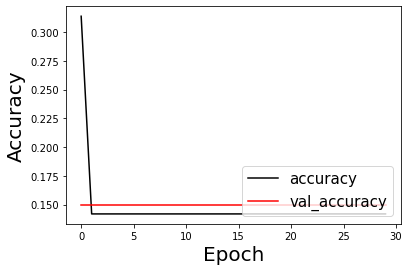

In [18]:
plt.plot(history.history['accuracy'], label='accuracy', color = 'k')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color = 'r')
plt.xlabel('Epoch', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(loc='lower right', fontsize=15)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
#plt.savefig("visualizations/accuracy_epoch.png",bbox_inches='tight')

13/13 - 0s - loss: nan - accuracy: 0.1493 - 189ms/epoch - 15ms/step


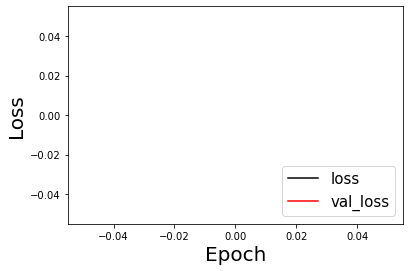

In [19]:
plt.plot(history.history['loss'], label='loss', color = 'k')
plt.plot(history.history['val_loss'], label = 'val_loss', color = 'r')
plt.xlabel('Epoch', size=20)
plt.ylabel('Loss', size=20)
plt.legend(loc='lower right', fontsize=15)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
#plt.savefig("visualizations/loss_epoch.png",bbox_inches='tight')